In [12]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", None)

In [13]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [14]:
# Separate target and featurbes in train dataset
target = train['Survived']
train = train.drop(columns=['Survived'])

In [15]:
# Feature extraction from name.

# Creating the rank column based from the name.
accepted_ranks = ['Mr', 'Mrs', 'Miss', 'Master', 'Other']
rank_transform = {'Mlle': 'Miss', 'Ms': 'Mrs', 'Mme': 'Mrs'}

train['Rank'] = pd.Categorical(train['Name'].apply(lambda x: x.split('.')[0].split(' ')[-1]).replace(rank_transform), categories=accepted_ranks).fillna('Other')
test['Rank'] = pd.Categorical(test['Name'].apply(lambda x: x.split('.')[0].split(' ')[-1]).replace(rank_transform), categories=accepted_ranks).fillna('Other')

In [16]:
# Drop non exploitable columns
unwanted_columns = ['Cabin', 'PassengerId', 'Name', 'Ticket']

train = train.drop(columns=unwanted_columns)
test = test.drop(columns=unwanted_columns)

In [17]:
# Embarked data imputation:
imputed_embarked_value = train['Embarked'].mode()[0]

train['Embarked'] = train['Embarked'].fillna(imputed_embarked_value)
test['Embarked'] = test['Embarked'].fillna(imputed_embarked_value)

# Age data imputation:
imputed_age_value = train['Age'].mean()

train['Age'] = train['Age'].fillna(imputed_age_value)
test['Age'] = test['Age'].fillna(imputed_age_value)

In [18]:
# Data encoding
numeric_cols = train.select_dtypes(['float', 'int']).columns
categorical_cols = train.select_dtypes(['category', 'object']).columns

# Data encoding:
encoder = OneHotEncoder()

train_encoded_features = encoder.fit_transform(train[categorical_cols])
test_encoded_features = encoder.transform(test[categorical_cols])

train_encoded = pd.concat([
    train.drop(columns=categorical_cols),
    pd.DataFrame(train_encoded_features.toarray(), columns=encoder.get_feature_names_out())
], axis=1) 

test_encoded = pd.concat([
    test.drop(columns=categorical_cols),
    pd.DataFrame(test_encoded_features.toarray(), columns=encoder.get_feature_names_out())
], axis=1)

# Data normalization
scaler = MinMaxScaler()
train_encoded[numeric_cols] = scaler.fit_transform(train_encoded[numeric_cols])
test_encoded[numeric_cols] = scaler.transform(test_encoded[numeric_cols])

In [19]:
# Model exploration:
random_state = 111

In [20]:
# Imports and display results function

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def display_results(y_real, y_pred):
    print(f"Accuracy: {accuracy_score(y_real, y_pred)}")

    print(classification_report(y_real, y_pred))

    cm = confusion_matrix(y_real, y_pred)

    palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=palette);

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Died', 'Survived']) 
    ax.yaxis.set_ticklabels(['Died', 'Survived'])

In [21]:
# Split train dataset in Train and Validation
X_train, X_test, y_train, y_test = train_test_split(train_encoded, target, test_size=0.3, random_state=random_state)

Accuracy: 0.8246268656716418
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       171
           1       0.78      0.71      0.75        97

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



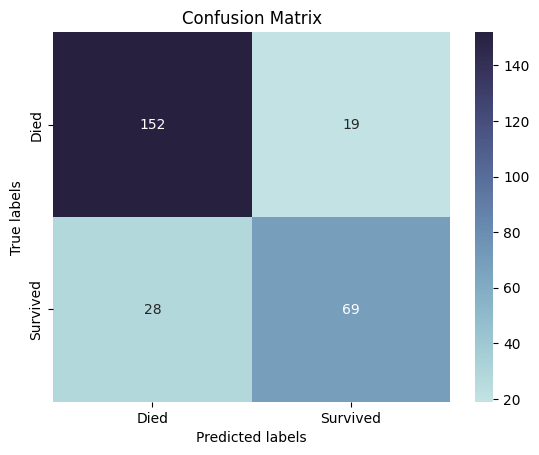

In [22]:
# Linear Regression (LogisticRegression)
logistic_regression_model = LogisticRegression(random_state=random_state)

logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

display_results(y_test, y_pred)